All explanations here https://miro.com/welcome/b2xnbFlhWXBubkdORFRkeEpPZ0luQWdQM3REcnQ3TFJjZzJpZTJDV25DVTBKUXNYMWtsZkowM3NMQllpZXZYcXwzNDU4NzY0NTgwNjUzOTAwMDgxfDQ=?share_link_id=285740774717

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('csv/digits_dataset.csv')
data.head()

In [35]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [36]:
print(Y_train)

[8 9 9 ... 0 0 1]


In [42]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def ReLU(x):
    return np.maximum(x, 0)

def softmax(x):
    return np.exp(x) / sum(np.exp(x))

def forward(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y.T

def ReLU_deriv(x):
    return x > 0

def backward(z1, a1, z2, a2, w1, w2, x, y):
    one_hot_y = one_hot(y)

    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)

    dz1 = w2.T.dot(dz2) * ReLU_deriv(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1)

    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate):
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    return w1, b1, w2, b2


In [43]:
def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def gradient_descent(x, y, alpha, iterations):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = backward(z1, a1, z2, a2, w1, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(a2)
            print(get_accuracy(predictions, y))
    return w1, b1, w2, b2

In [45]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 2000)

Iteration:  0
[5 2 0 ... 5 6 3] [8 9 9 ... 0 0 1]
0.08665853658536585
Iteration:  10
[4 3 3 ... 5 6 3] [8 9 9 ... 0 0 1]
0.15958536585365854
Iteration:  20
[4 3 3 ... 9 6 3] [8 9 9 ... 0 0 1]
0.23468292682926828
Iteration:  30
[4 1 3 ... 9 6 3] [8 9 9 ... 0 0 1]
0.3002682926829268
Iteration:  40
[4 1 3 ... 9 6 1] [8 9 9 ... 0 0 1]
0.35517073170731706
Iteration:  50
[4 1 3 ... 9 5 1] [8 9 9 ... 0 0 1]
0.39263414634146343
Iteration:  60
[9 9 3 ... 9 5 1] [8 9 9 ... 0 0 1]
0.4245609756097561
Iteration:  70
[9 9 3 ... 9 5 1] [8 9 9 ... 0 0 1]
0.4541219512195122
Iteration:  80
[9 9 3 ... 9 0 1] [8 9 9 ... 0 0 1]
0.4837560975609756
Iteration:  90
[9 9 3 ... 9 0 1] [8 9 9 ... 0 0 1]
0.5082926829268293
Iteration:  100
[9 4 3 ... 5 0 1] [8 9 9 ... 0 0 1]
0.5291707317073171
Iteration:  110
[9 4 3 ... 5 0 1] [8 9 9 ... 0 0 1]
0.5451951219512196
Iteration:  120
[8 4 3 ... 5 0 1] [8 9 9 ... 0 0 1]
0.5608536585365854
Iteration:  130
[8 4 3 ... 5 0 1] [8 9 9 ... 0 0 1]
0.5767560975609756
Iteration:  

In [46]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


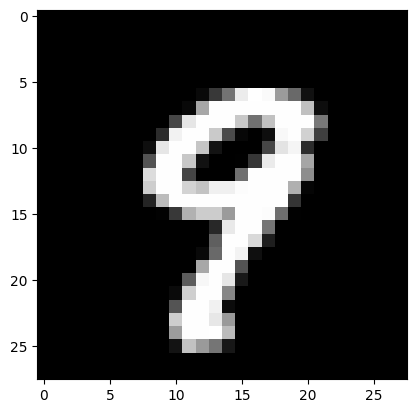

Prediction:  [9]
Label:  9


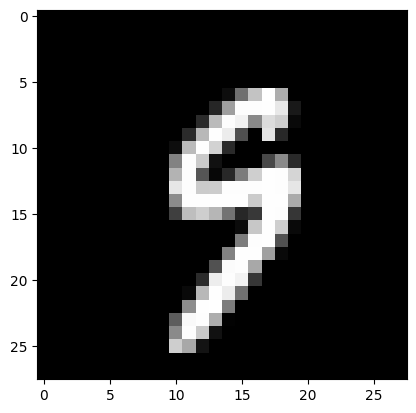

Prediction:  [6]
Label:  6


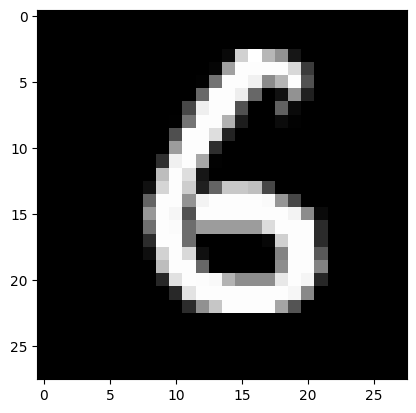

Prediction:  [4]
Label:  4


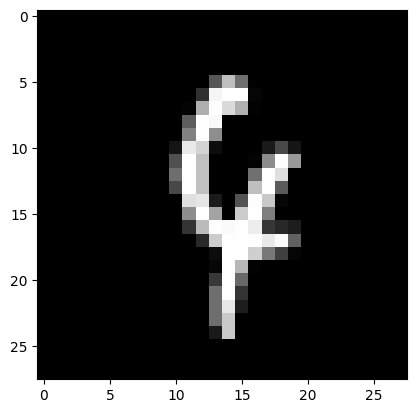

In [47]:
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)

In [48]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 3 0 4 6 5 3 6 1 7 8 8 5 0 7 8 2 3 8 6 8 3 3 0 1 1 3 6 4 0 4 8 7 3 3 0 2
 3 7 3 6 2 5 6 6 2 0 1 1 3 3 3 3 7 2 8 1 7 0 3 6 3 4 7 4 4 2 6 7 6 8 3 7 1
 4 1 9 2 7 2 1 9 9 0 9 4 7 6 9 8 7 6 9 2 8 4 2 3 3 2 1 1 8 1 6 3 5 4 7 5 6
 7 6 9 8 8 5 2 1 9 6 7 4 6 0 3 1 4 6 4 7 4 2 1 2 4 0 4 0 7 4 3 8 2 4 6 7 7
 3 6 1 3 2 4 6 5 8 9 3 5 7 3 2 3 7 4 7 0 8 2 6 8 7 1 3 1 2 4 1 6 1 6 6 1 9
 7 0 1 9 4 6 5 2 9 6 5 7 7 2 9 5 4 9 6 5 6 6 5 0 5 0 4 8 1 3 9 1 5 5 2 7 3
 4 7 8 4 7 5 2 6 0 2 2 1 8 8 2 6 2 1 2 8 1 6 0 5 6 8 8 2 1 4 0 2 7 9 1 8 5
 3 3 8 7 2 5 0 2 3 5 4 7 7 1 0 7 0 1 5 8 2 3 9 2 1 6 8 8 1 8 0 1 5 3 7 3 3
 0 5 0 6 2 4 9 0 2 2 8 4 8 2 7 7 5 6 2 8 9 9 1 3 2 5 9 3 1 2 5 9 9 1 1 0 3
 1 4 8 5 1 6 7 1 2 4 8 8 1 1 1 4 4 7 6 1 1 9 9 8 5 3 3 5 0 4 9 0 5 6 5 8 6
 0 1 4 4 6 8 5 4 3 0 4 0 6 3 3 8 6 1 6 4 3 5 0 8 6 0 8 2 1 2 3 8 4 3 1 5 2
 5 5 1 0 6 2 3 1 1 9 4 4 9 3 3 9 9 3 7 7 6 6 9 6 0 4 3 5 7 0 8 1 7 1 3 4 1
 9 5 9 1 1 2 0 6 8 7 5 3 4 2 1 3 1 7 9 9 1 8 3 8 6 0 9 2 0 4 6 0 7 6 1 7 6
 5 7 3 8 9 4 5 3 7 5 8 8 

0.892